#  Multinomial NB example on MNIST Dataset

In [70]:
from sklearn.datasets import load_digits

In [71]:
mnist = load_digits()

In [72]:
X = mnist.data
Y = mnist.target

In [73]:
mnist.target_names # total possible digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
X.shape # 64 features per digit image of size 8X8

(1797, 64)

In [75]:
Y.shape

(1797,)

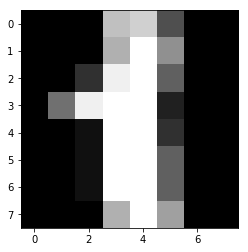

In [76]:
import matplotlib.pyplot as plt
plt.imshow(X[1].reshape(8,8),cmap='gray')
plt.show()

In [77]:
Y[1]

1

In [78]:
X[0] # values are in range 0(000) to 15(111) -> shades of grey !

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [79]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state = 101)

In [80]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### Applying Multinomial Naive Bayes (as each feature of image has 16 different values)

In [81]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
mnb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
mnb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
mnb.predict_proba(X_test[0].reshape((1,-1)))

array([[1.15456271e-130, 6.13092874e-060, 3.24884657e-092,
        3.31212248e-075, 5.19568172e-064, 1.72442368e-056,
        1.20017925e-144, 1.00000000e+000, 1.40557595e-055,
        1.73407453e-055]])

In [86]:
Y_test[0]

7

In [87]:
mnb.predict(X_test[0].reshape((1,-1)))

array([7])

### Accuracy

In [88]:
Y_pred = mnb.predict(X_test)

In [89]:
mnb.score(X_test,Y_test)

0.9155555555555556

In [90]:
import numpy as np
np.sum(Y_pred == Y_test) / X_test.shape[0]

0.9155555555555556

### Applyting Bernoulli Naive bayes( converting 16 differnent values to 2 values using  binarizer)

In [91]:
from sklearn.naive_bayes import BernoulliNB

In [92]:
bnb = BernoulliNB(binarize = 7 ) # if values are below or equal to 7 all changes to 0 else 1 

In [93]:
bnb.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=7, class_prior=None, fit_prior=True)

In [94]:
bnb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
bnb.predict_proba(X_test[0].reshape((1,-1)))

array([[1.85725429e-16, 3.84837258e-10, 2.38737848e-12, 5.19525179e-09,
        2.34463989e-10, 1.10719034e-10, 1.39067356e-19, 9.99999672e-01,
        4.15975813e-08, 2.80422953e-07]])

In [96]:
Y_test[0]

7

In [97]:
bnb.predict(X_test[0].reshape((1,-1)))

array([7])

### Accuracy(less than mutinomial)

In [98]:
Y_pred = bnb.predict(X_test)

In [99]:
bnb.score(X_test,Y_test)

0.8888888888888888

In [100]:
import numpy as np
np.sum(Y_pred == Y_test) / X_test.shape[0]

0.8888888888888888